In [4]:
from enlighten_inference import EnlightenOnnxModel
import cv2
from matplotlib import pyplot as plt
import torch
import onnxruntime as rt
img = cv2.imread('data/ExDark/ExDarkFlat/2015_00003.png')

model = EnlightenOnnxModel(providers=['CPUExecutionProvider'])




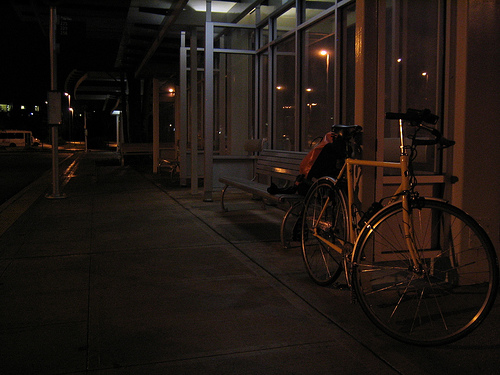

In [6]:
from PIL import Image

img = Image.open('data/ExDark/ExDarkFlat/2015_00003.png')
img

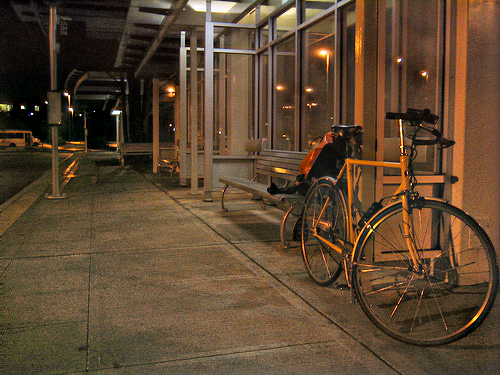

In [13]:
import numpy as np
processed = model.predict(np.array(img))
pil_img = Image.fromarray(processed)
pil_img

In [14]:
def enlighten_image(img_path, model, dest_dir):
    img = Image.open(img_path)
    processed = model.predict(np.array(img))
    pil_img = Image.fromarray(processed)
    img_name = os.path.basename(img_path)
    dest_path = os.path.join(dest_dir, img_name)
    pil_img.save(dest_path)

In [17]:
import shutil
import os

test_dir = "data/ExDark/conditions/low"
img_exts = ['.jpeg', '.jpg', '.JPG', '.JPEG', '.png']
dest_dir = "enlightened_images"
if os.path.exists(dest_dir):
    shutil.rmtree(dest_dir)
os.mkdir(dest_dir)

for file in os.listdir(test_dir):
    ext = os.path.splitext(file)[1]
    if ext in img_exts:
        img_path = os.path.join(test_dir, file)
        try:
            enlighten_image(img_path, model, dest_dir)    
            print(f"saved {file}")
        except Exception as e:
            print(f"failed to process {file} with error {e}")

saved 2015_03571.jpg
saved 2015_04726.JPG
saved 2015_01634.jpg
saved 2015_03765.jpg
saved 2015_01624.jpg
saved 2015_04177.JPG
saved 2015_03635.jpg
saved 2015_01718.JPG
saved 2015_01616.jpg
saved 2015_03695.jpg
saved 2015_03418.jpg
saved 2015_03550.jpg
saved 2015_02723.jpg
saved 2015_01623.jpg
saved 2015_01723.JPG
saved 2015_01717.JPG
saved 2015_07271.jpg
saved 2015_03492.jpg
saved 2015_06070.jpg
saved 2015_03608.jpg
saved 2015_03411.jpg
saved 2015_03662.jpg
saved 2015_00304.jpg
saved 2015_04174.JPG
saved 2015_01852.jpg
saved 2015_05183.jpg
failed to process 2015_06830.png with error [ONNXRuntimeError] : 2 : INVALID_ARGUMENT : Got invalid dimensions for input: input for the following indices
 index: 1 Got: 4 Expected: 3
 Please fix either the inputs/outputs or the model.
saved 2015_04723.jpg
saved 2015_03156.jpg
saved 2015_00289.jpg
saved 2015_00449.JPG
saved 2015_03506.jpg
saved 2015_01537.jpg
saved 2015_03544.jpg
saved 2015_05585.jpg
saved 2015_05128.jpg
saved 2015_05271.jpg
saved 201